In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('/home/mehul/Documents/training/python/data/airline-passengers.csv', parse_dates=['Month'], index_col=0)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [28]:
from statsmodels.tsa.stattools import adfuller

In [29]:
adfuller(df)

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [30]:
first_dif = df.diff().dropna()
first_dif

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


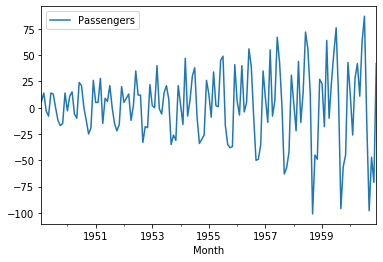

In [31]:
first_dif.plot()

In [32]:
adfuller(first_dif)

(-2.8292668241699874,
 0.05421329028382711,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [33]:
second_diff = df.diff().diff().dropna()
second_diff

,Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


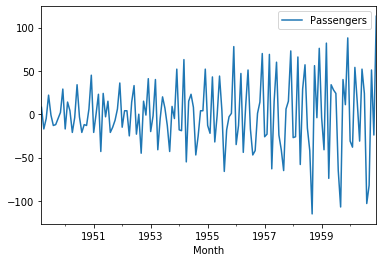

In [34]:
second_diff.plot()

In [35]:
adfuller(second_diff)

(-16.384231542468513,
 2.7328918500142026e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275606)

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf

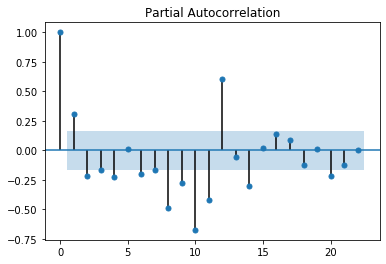

In [37]:
plot_pacf(first_dif)
plt.show() # p = 5

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

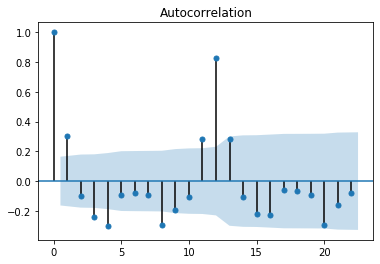

In [39]:
plot_acf(first_dif)
plt.show() # q = 1

In [40]:
x = df.values.ravel()
x

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

In [41]:
partition = round(0.70 * len(x))
train, test = x[:partition], x[partition:]

In [42]:
print(train)
print(test)

[112 118 132 129 121 135 148 148 136 119 104 118 115 126 141 135 125 149
 170 170 158 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166
 171 180 193 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243
 264 272 237 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229
 242 233 267 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374
 413 405 355 306 271 306 315 301 356 348 355]
[422 465 467 404 347 305 336 340 318 362 348 363 435 491 505 404 359 310
 337 360 342 406 396 420 472 548 559 463 407 362 405 417 391 419 461 472
 535 622 606 508 461 390 432]


In [43]:
history = [x for x in train]
predictions = []

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
for i in range(len(test)):
    model = ARIMA(history, order=(5, 1, 1))
    model_fit = model.fit()
    prediction_list = model_fit.forecast()
    predictions.append(prediction_list[0][0])
    history.append(test[i])
    print('Predicted {0}'.format(prediction_list[0][0]))
    print('Expected {0}'.format(test[i]))

Predicted 362.8318255660249
Expected 422
Predicted 406.80886686571023
Expected 465
Predicted 440.10379521203606
Expected 467
Predicted 441.09922664644273
Expected 404
Predicted 357.5777136739003
Expected 347
Predicted 321.3808219059665
Expected 305
Predicted 294.500514640219
Expected 336
Predicted 365.76224030321134
Expected 340
Predicted 355.6909520965134
Expected 318
Predicted 338.5878128268668
Expected 362
Predicted 388.60457732449953
Expected 348
Predicted 347.7342869431203
Expected 363
Predicted 386.3323103138913
Expected 435
Predicted 437.00775936838056
Expected 491
Predicted 479.10312058233467
Expected 505
Predicted 480.2587308006657
Expected 404
Predicted 348.34785545025113
Expected 359
Predicted 348.58607672253953
Expected 310
Predicted 301.582842032032
Expected 337
Predicted 375.33174346535685
Expected 360
Predicted 388.7236632824386
Expected 342
Predicted 368.234974876244
Expected 406
Predicted 440.5768520933592
Expected 396
Predicted 397.2700153419991
Expected 420
Predicted

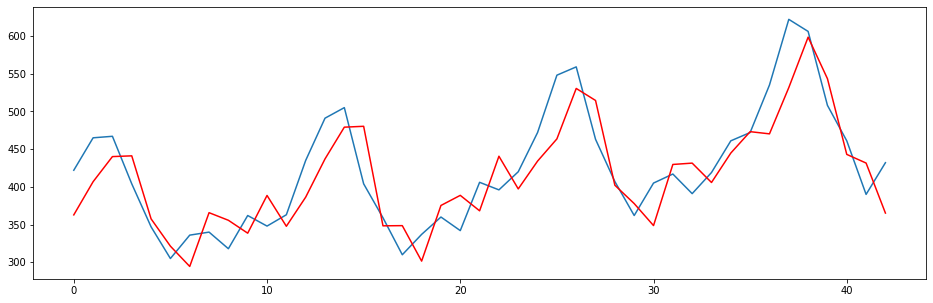

In [47]:
plt.figure(figsize=(16,5))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [50]:
sqrt(mean_squared_error(test, predictions))

41.618929922991036